# Loan Approval Prediction:

#### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Source
https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook


### Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import *

train_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train_df['Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

selecao = (train_df['Loan_Status'] == 'Y')
train_aproved = train_df[selecao]

selecao = (train_df['Loan_Status'] == 'N')
train_reproved = train_df[selecao]

selecao = (train_aproved['Credit_History'] == 0)
train_aproved_credit_reproved = train_aproved[selecao]

selecao = (train_reproved['Credit_History'] == 1)
train_reproved_credit_aproved = train_reproved[selecao]
train_reproved_credit_aproved

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,4693.0
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,4887.0
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,1442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,35673.0
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N,7283.0
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N,6000.0
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N,7383.0


### Descritive Functions

In [66]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Income             614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


### Understanding some variables

In [68]:
objects_of_df = train_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']]
for column in objects_of_df:
    print(objects_of_df[column].unique())
    
    

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


The code above is to have the first impressions of the data and to decide the initial steps for deta visualization

### Printing bar plots for all elements

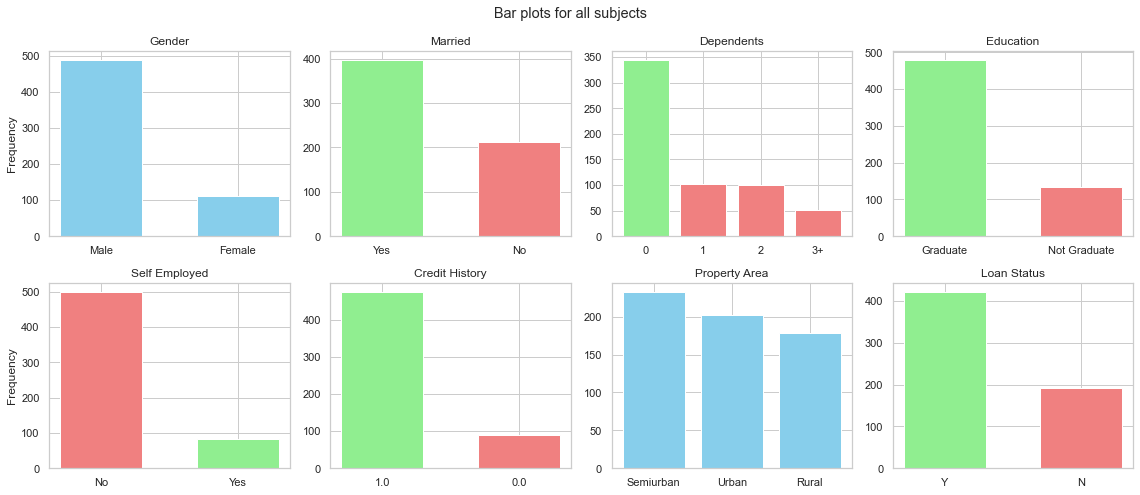

In [69]:
# Print bar plots for all elements
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 7), layout='tight')
fig.suptitle('Bar plots for all subjects')

ax11 = train_df.Gender.value_counts(sort=False).index
ax12 = train_df.Gender.value_counts(sort=False)
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Frequency')
ax1.set_title('Gender')

ax21 = train_df.Married.value_counts(sort=True).index
ax22 = train_df.Married.value_counts(sort=True)
ax2.bar(ax21,ax22,color=['lightgreen','lightcoral'],width=0.6)
ax2.set_title('Married')

ax31 = train_df.Dependents.value_counts(sort=True).index
ax32 = train_df.Dependents.value_counts(sort=True)
ax3.bar(ax31,ax32,color=['lightgreen','lightcoral', 'lightcoral','lightcoral'])
ax3.set_title('Dependents')

ax41 = train_df.Education.value_counts(sort=True).index
ax42 = train_df.Education.value_counts(sort=True)
ax4.bar(ax41,ax42,color=['lightgreen', 'lightcoral'],width=0.6)
ax4.set_title('Education')

ax51 = train_df.Self_Employed.value_counts(sort=True).index
ax52 = train_df.Self_Employed.value_counts(sort=True)
ax5.bar(ax51,ax52,color=['lightcoral', 'lightgreen'],width=0.6)
ax5.set_ylabel('Frequency')
ax5.set_title('Self Employed')

ax61 = train_df.Credit_History.value_counts(sort=True).index
ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = train_df.Credit_History.value_counts(sort=True)
ax6.bar(ax61,ax62,color=['lightgreen', 'lightcoral'],width=0.6)
ax6.set_title('Credit History')

ax71 = train_df.Property_Area.value_counts(sort=True).index
ax72 = train_df.Property_Area.value_counts(sort=True)
ax7.bar(ax71,ax72, color=['skyblue','skyblue', 'skyblue'])
ax7.set_title('Property Area')

ax81 = train_df.Loan_Status.value_counts(sort=True).index
ax82 = train_df.Loan_Status.value_counts(sort=True)
ax8.bar(ax81,ax82,color=['lightgreen', 'lightcoral'],width=0.6)
ax8.set_title('Loan Status');

#### Understanding the data using bar plots, initial insights

The majority of subjects on data are man, Married, with no Dependents, who has a graduation, isn't self employed, has a credit history (meets the guidelines), and have the loan status aproved. There isn't too much difference for the property area.

### Printing Histplots for continuous variables

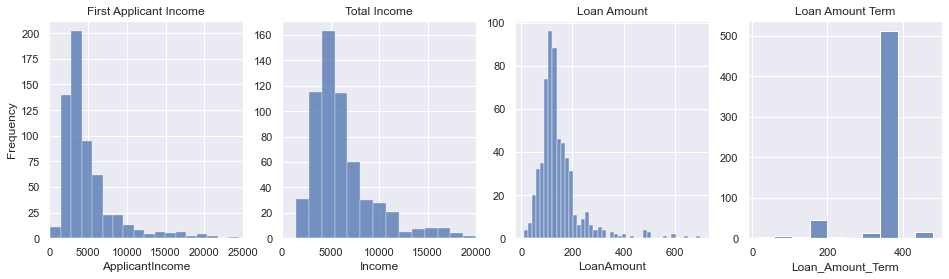

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize": (16, 4)}) 

subplot(1,4,1)
ax = sns.histplot(train_df.ApplicantIncome,bins=60)
ax.set_xlim([0, 25000])
ax.set_ylabel('Frequency')
ax.set_title('First Applicant Income')

subplot(1,4,2)
ax = sns.histplot(train_df.Income,bins=60)
ax.set_xlim([0, 20000])
ax.set_ylabel('')
ax.set_title('Total Income')

subplot(1,4,3)
ax = sns.histplot(train_df.LoanAmount)
ax.set_ylabel('')
ax.set_title('Loan Amount')

subplot(1,4,4)
ax = sns.histplot(train_df.Loan_Amount_Term, bins = 10)
ax.set_ylabel('')
ax.set_title('Loan Amount Term')

plt.show()


#### Understanding the data using hist plots, initial insights
The subjects on data have in median 3000 dolars of income, while the total income (applicant + coapplicant) has in median 5000 dolars of income. the Loan amount desired is in median around 100.000 dolars, and the great majority of subjects is requesting a 360 months term. 

### Printing bar plots for aproved loan status

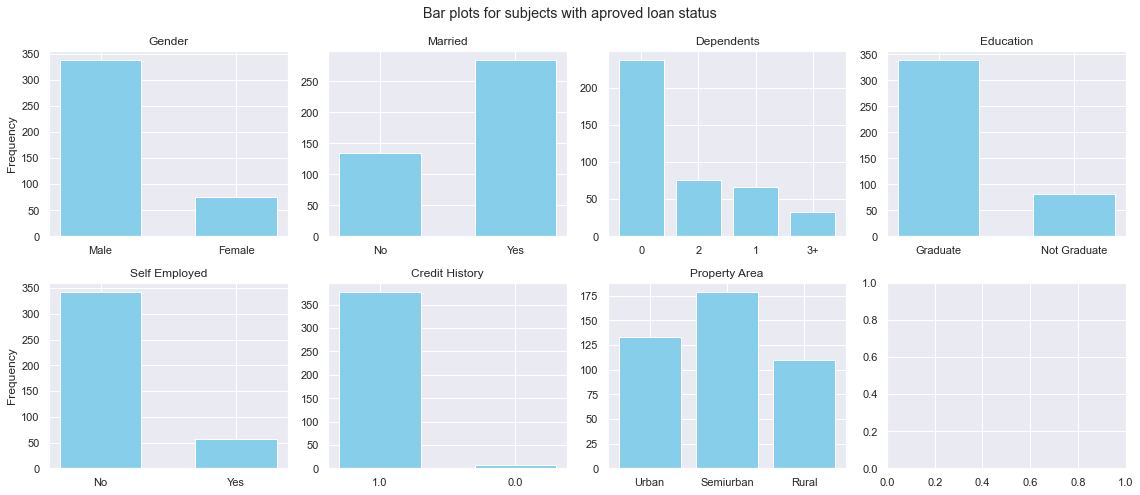

In [74]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 7), layout='tight')
fig.suptitle('Bar plots for subjects with aproved loan status')

selecao = (train_df['Loan_Status'] == 'Y')

train_aproved = train_df[selecao]

ax11 = train_aproved.Gender.value_counts(sort=False).index
ax12 = train_aproved.Gender.value_counts(sort=False)
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Frequency')
ax1.set_title('Gender')

ax21 = train_aproved.Married.value_counts(sort=False).index
ax22 = train_aproved.Married.value_counts(sort=False)
ax2.bar(ax21,ax22,color=['skyblue', 'skyblue'],width=0.6)
ax2.set_title('Married')

ax31 = train_aproved.Dependents.value_counts(sort=True).index   ##%%
ax32 = train_aproved.Dependents.value_counts(sort=True)
ax3.bar(ax31,ax32,color=['skyblue','skyblue', 'skyblue','skyblue'])
ax3.set_title('Dependents')

ax41 = train_aproved.Education.value_counts(sort=False).index
ax42 = train_aproved.Education.value_counts(sort=False)
ax4.bar(ax41,ax42,color=['skyblue', 'skyblue'],width=0.6)
ax4.set_title('Education')

ax51 = train_aproved.Self_Employed.value_counts(sort=False).index
ax52 = train_aproved.Self_Employed.value_counts(sort=False)
ax5.bar(ax51,ax52,color=['skyblue', 'skyblue'],width=0.6)
ax5.set_ylabel('Frequency')
ax5.set_title('Self Employed')

ax61 = train_aproved.Credit_History.value_counts(sort=False).index
ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = train_aproved.Credit_History.value_counts(sort=False)
ax6.bar(ax61,ax62,color=['skyblue', 'skyblue'],width=0.6)
ax6.set_title('Credit History')

ax71 = train_aproved.Property_Area.value_counts(sort=False).index
ax72 = train_aproved.Property_Area.value_counts(sort=False)
ax7.bar(ax71,ax72, color=['skyblue','skyblue', 'skyblue'])
ax7.set_title('Property Area');


#### Understanding the data using bar plots for subjects with approved loan
The majority of subjects on data are man, with no Dependents, who has a graduation, isn't self employed. we have slightly more subjects married and with credit history (meets the guidelines) than without it. There isn't too much difference for the property area.


### Looking at the percentage data for approved subjects

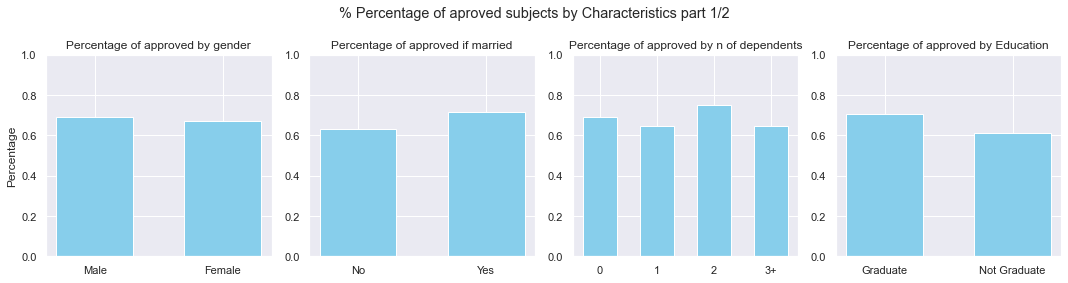

In [75]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(1, 4, figsize=(15, 4), layout='tight')
fig.suptitle('% Percentage of aproved subjects by Characteristics part 1/2')   

train_percentage_of_approved = train_aproved.Gender.value_counts(sort=False)/train_df.Gender.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of approved by gender')
ax1.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Married.value_counts(sort=False)/train_df.Married.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax2.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax2.set_title('Percentage of approved if married')
ax2.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Dependents.value_counts(sort=False)/train_df.Dependents.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax3.bar(ax11,ax12, color=['skyblue', 'skyblue','skyblue', 'skyblue'],width=0.6)
ax3.set_title('Percentage of approved by n of dependents')
ax3.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Education.value_counts(sort=False)/train_df.Education.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax4.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax4.set_title('Percentage of approved by Education')
ax4.set_ylim([0, 1]);


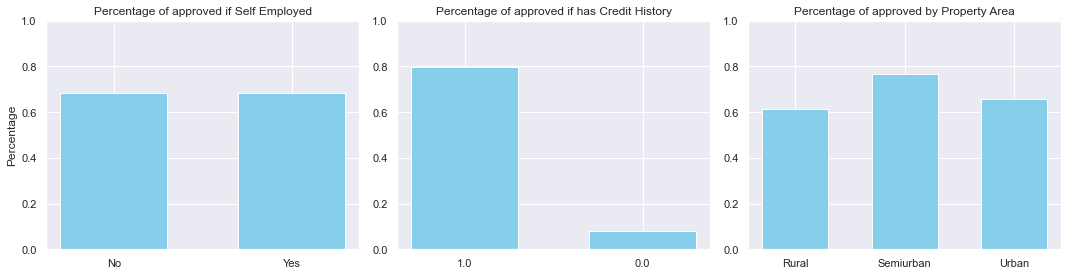

In [60]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 4), layout='tight')
# fig.suptitle('% Percentage of aproved subjects by Characteristics part 2/2')   


train_percentage_of_approved = train_aproved.Self_Employed.value_counts(sort=False)/train_df.Self_Employed.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of approved if Self Employed')
ax1.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Credit_History.value_counts(sort=False)/train_df.Credit_History.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax11 = list([str(ax11[0]),str(ax11[1])])
ax12 = train_percentage_of_approved
ax2.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax2.set_title('Percentage of approved if has Credit History')
ax2.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Property_Area.value_counts(sort=False)/train_df.Property_Area.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax3.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax3.set_title('Percentage of approved by Property Area')
ax3.set_ylim([0, 1]);


#### Understanding approved subjects by characteristic
The percentage of aproved subjects aproved with credit history is a lot bigger than the percentage without credit history (meets the guidelines). Also the percentage of aproved subjects for subjects married and with graduation is a bit bigger than unmarried subjects and without graduation. Lastly, 

### Correlation Between continuous variables

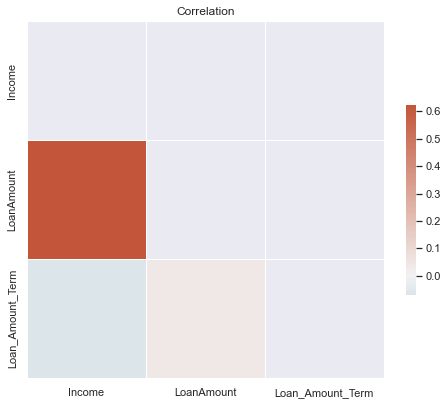

In [77]:
corr = train_df[['Income', 'LoanAmount', 'Loan_Amount_Term']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation');


#### Understanding the correlation between continuous variables
The loan amount has  a correlation with the applicats income.

## Comparing the loan amount and the income

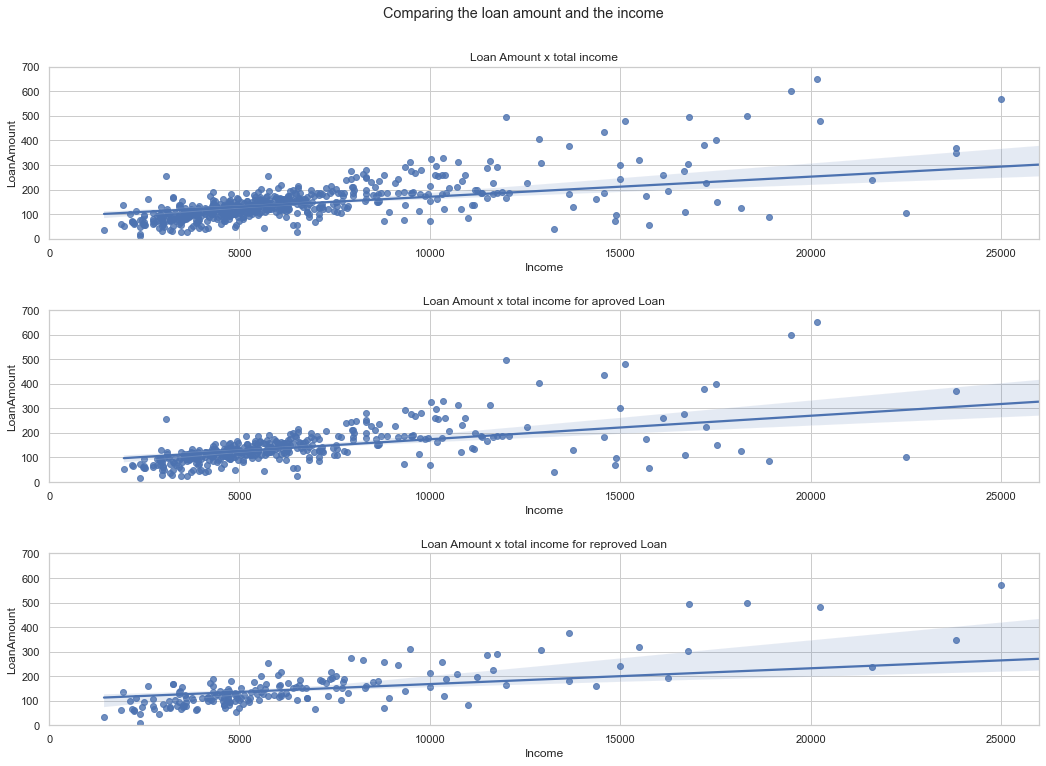

In [121]:
fig, axes = plt.subplots(3, 1, figsize=(15, 11), sharey=True)
fig.suptitle('Comparing the loan amount and the income')

# Bulbasaur

sns.set(style='whitegrid')
sns.regplot(ax=axes[0],x="Income", y="LoanAmount", data=train_df);
axes[0].set_title('Loan Amount x total income')
axes[0].set_xlim((0, 26000))
axes[0].set_ylim((0, 700))


sns.set(style='whitegrid')
sns.regplot(ax=axes[1],x="Income", y="LoanAmount", data=train_aproved);
axes[1].set_title('Loan Amount x total income for aproved Loan')
axes[1].set_xlim((0, 26000))
axes[1].set_ylim((0, 700))


sns.set(style='whitegrid')
sns.regplot(ax=axes[2],x="Income", y="LoanAmount", data=train_reproved);
axes[2].set_title('Loan Amount x total income for reproved Loan')
axes[2].set_xlim((0, 26000))
axes[2].set_ylim((0, 700))

fig.tight_layout(pad=2.0)

#### Understanding the relation between income and Loan amount
for all subjects there is a increase on the loan amount in thounsand dollar with a bigger income.

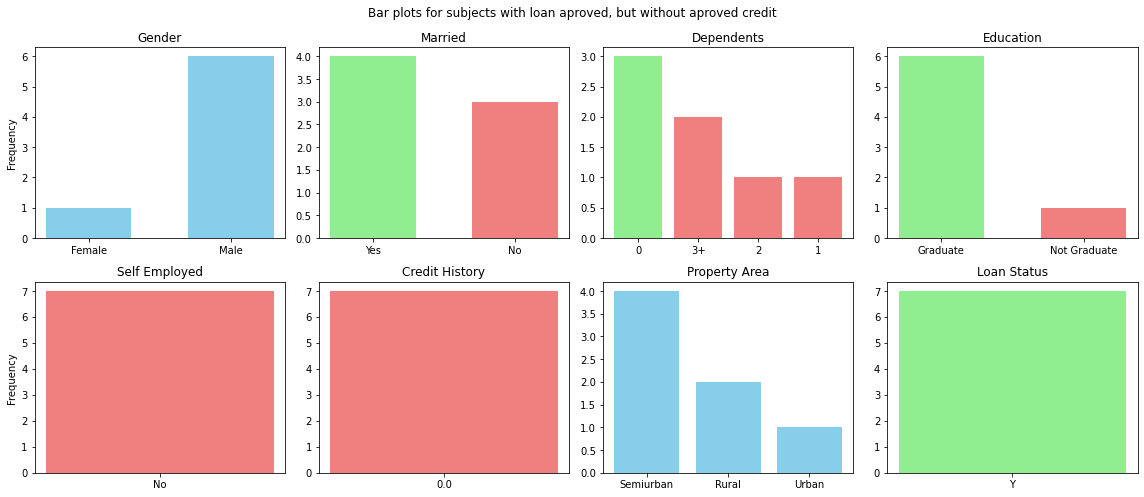

In [10]:
# Print bar plots for all elements
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 7), layout='tight')
fig.suptitle('Bar plots for subjects with loan aproved, but without aproved credit')

ax11 = train_aproved_credit_reproved.Gender.value_counts(sort=False).index
ax12 = train_aproved_credit_reproved.Gender.value_counts(sort=False)
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Frequency')
ax1.set_title('Gender')

ax21 = train_aproved_credit_reproved.Married.value_counts(sort=True).index
ax22 = train_aproved_credit_reproved.Married.value_counts(sort=True)
ax2.bar(ax21,ax22,color=['lightgreen','lightcoral'],width=0.6)
ax2.set_title('Married')

ax31 = train_aproved_credit_reproved.Dependents.value_counts(sort=True).index
ax32 = train_aproved_credit_reproved.Dependents.value_counts(sort=True)
ax3.bar(ax31,ax32,color=['lightgreen','lightcoral', 'lightcoral','lightcoral'])
ax3.set_title('Dependents')

ax41 = train_aproved_credit_reproved.Education.value_counts(sort=True).index
ax42 = train_aproved_credit_reproved.Education.value_counts(sort=True)
ax4.bar(ax41,ax42,color=['lightgreen', 'lightcoral'],width=0.6)
ax4.set_title('Education')

ax51 = train_aproved_credit_reproved.Self_Employed.value_counts(sort=True).index
ax52 = train_aproved_credit_reproved.Self_Employed.value_counts(sort=True)
ax5.bar(ax51,ax52,color=['lightcoral', 'lightgreen'],width=0.6)
ax5.set_ylabel('Frequency')
ax5.set_title('Self Employed')

ax61 = train_aproved_credit_reproved.Credit_History.value_counts(sort=True).index
ax61 = list([str(ax61[0])])
ax62 = train_aproved_credit_reproved.Credit_History.value_counts(sort=True)
ax6.bar(ax61,ax62,color=['lightcoral'],width=0.6)
ax6.set_title('Credit History')

ax71 = train_aproved_credit_reproved.Property_Area.value_counts(sort=True).index
ax72 = train_aproved_credit_reproved.Property_Area.value_counts(sort=True)
ax7.bar(ax71,ax72, color=['skyblue','skyblue', 'skyblue'])
ax7.set_title('Property Area')

ax81 = train_aproved_credit_reproved.Loan_Status.value_counts(sort=True).index
ax82 = train_aproved_credit_reproved.Loan_Status.value_counts(sort=True)
ax8.bar(ax81,ax82,color=['lightgreen', 'lightcoral'],width=0.6)
ax8.set_title('Loan Status');

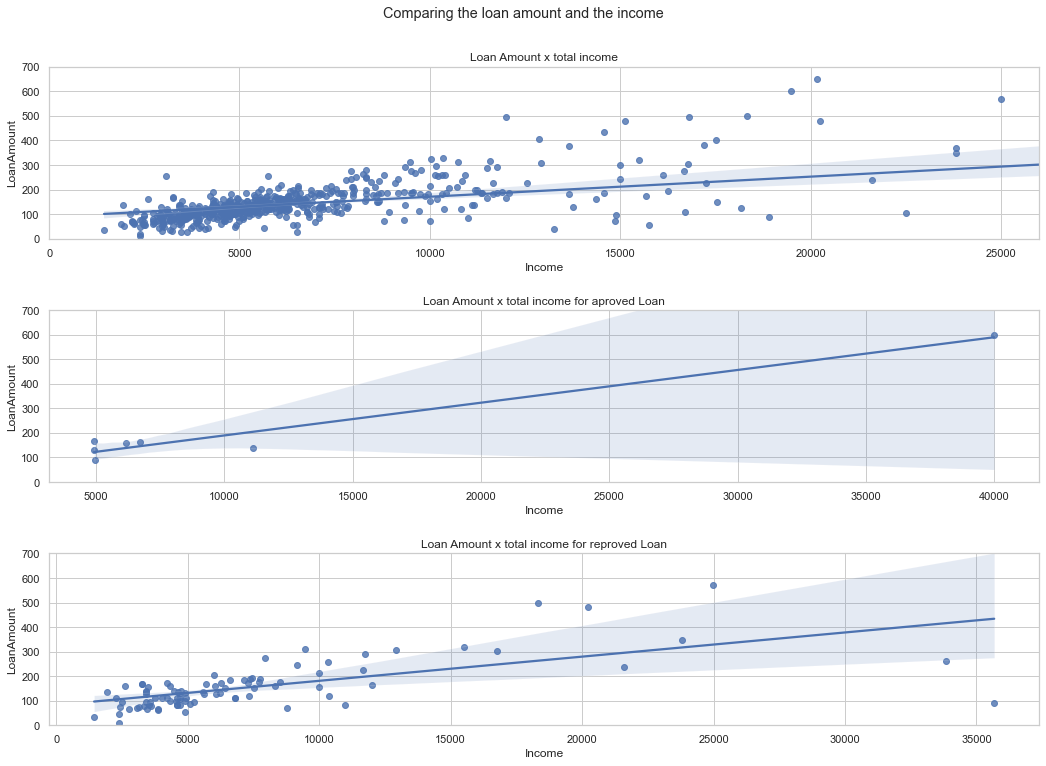

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(15, 11), sharey=True)
fig.suptitle('Comparing the loan amount and the income')

# Bulbasaur

sns.set(style='whitegrid')
sns.regplot(ax=axes[0],x="Income", y="LoanAmount", data=train_df);
axes[0].set_title('Loan Amount x total income')
axes[0].set_xlim((0, 26000))
axes[0].set_ylim((0, 700))


sns.set(style='whitegrid')
sns.regplot(ax=axes[1],x="Income", y="LoanAmount", data=train_aproved_credit_reproved);
axes[1].set_title('Loan Amount x total income for aproved Loan')



sns.set(style='whitegrid')
sns.regplot(ax=axes[2],x="Income", y="LoanAmount", data=train_reproved_credit_aproved);
axes[2].set_title('Loan Amount x total income for reproved Loan')


fig.tight_layout(pad=2.0)

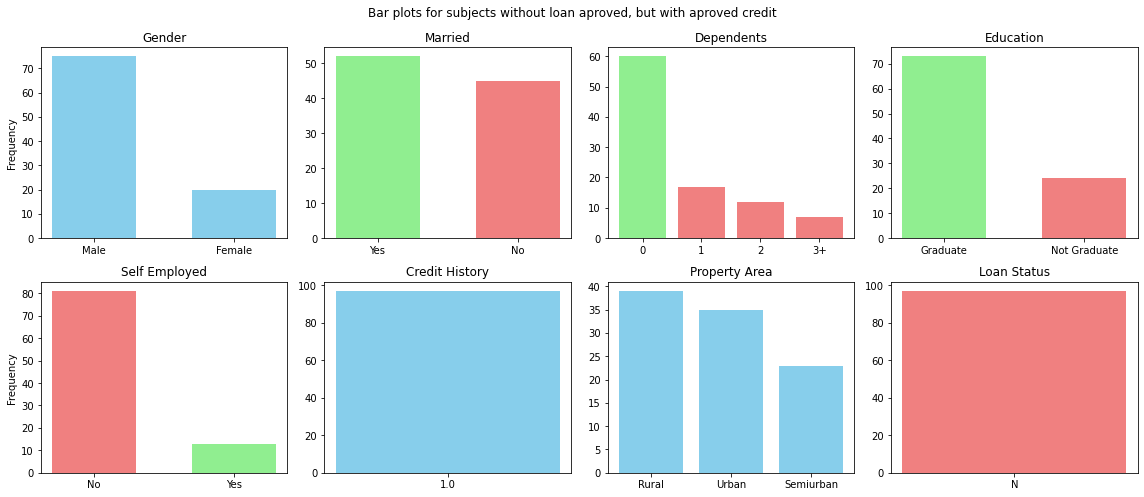

In [12]:
# Print bar plots for all elements
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 7), layout='tight')
fig.suptitle('Bar plots for subjects without loan aproved, but with aproved credit')

ax11 = train_reproved_credit_aproved.Gender.value_counts(sort=False).index
ax12 = train_reproved_credit_aproved.Gender.value_counts(sort=False)
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Frequency')
ax1.set_title('Gender')

ax21 = train_reproved_credit_aproved.Married.value_counts(sort=True).index
ax22 = train_reproved_credit_aproved.Married.value_counts(sort=True)
ax2.bar(ax21,ax22,color=['lightgreen','lightcoral'],width=0.6)
ax2.set_title('Married')

ax31 = train_reproved_credit_aproved.Dependents.value_counts(sort=True).index
ax32 = train_reproved_credit_aproved.Dependents.value_counts(sort=True)
ax3.bar(ax31,ax32,color=['lightgreen','lightcoral', 'lightcoral','lightcoral'])
ax3.set_title('Dependents')

ax41 = train_reproved_credit_aproved.Education.value_counts(sort=True).index
ax42 = train_reproved_credit_aproved.Education.value_counts(sort=True)
ax4.bar(ax41,ax42,color=['lightgreen', 'lightcoral'],width=0.6)
ax4.set_title('Education')

ax51 = train_reproved_credit_aproved.Self_Employed.value_counts(sort=True).index
ax52 = train_reproved_credit_aproved.Self_Employed.value_counts(sort=True)
ax5.bar(ax51,ax52,color=['lightcoral', 'lightgreen'],width=0.6)
ax5.set_ylabel('Frequency')
ax5.set_title('Self Employed')

ax61 = train_reproved_credit_aproved.Credit_History.value_counts(sort=True).index
ax61 = list([str(ax61[0])])
ax62 = train_reproved_credit_aproved.Credit_History.value_counts(sort=True)
ax6.bar(ax61,ax62,color=['skyblue'],width=0.6)
ax6.set_title('Credit History')

ax71 = train_reproved_credit_aproved.Property_Area.value_counts(sort=True).index
ax72 = train_reproved_credit_aproved.Property_Area.value_counts(sort=True)
ax7.bar(ax71,ax72, color=['skyblue','skyblue', 'skyblue'])
ax7.set_title('Property Area')

ax81 = train_reproved_credit_aproved.Loan_Status.value_counts(sort=True).index
ax82 = train_reproved_credit_aproved.Loan_Status.value_counts(sort=True)
ax8.bar(ax81,ax82,color=['lightcoral'],width=0.6)
ax8.set_title('Loan Status');